# Exploratory Data Analysis: Demographic Variables

Configure Spark and load necessary packages:

In [1]:
%%configure -f
{ "conf":{
          "spark.pyspark.python": "python3",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type":"native",
          "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
         }
}

ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1618096443965_0001,pyspark,idle,Link,Link,None,


In [3]:
sc.install_pypi_package("pandas")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/f3/d4/3fe3b5bf9886912b64ef040040aec356fa48825e5a829a84c2667afdf952/pandas-1.2.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

In [5]:
sc.install_pypi_package("matplotlib")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/ce/63/74c0b6184b6b169b121bb72458818ee60a7d7c436d7b1907bd5874188c55/matplotlib-3.4.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/33/34/542152297dcc6c47a9dcb0685eac6d652d878ed3cea83bf2b23cb988e857/Pillow-8.2.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/46/231de802ade4225b76b96cffe419cf3ce52bbe92e3b092cf12db7d11c207/kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl

Import necessary Python libraries:

In [15]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from pyspark.sql import functions as F

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Read in data:

In [6]:
df_notes=spark.read.parquet('s3://mimic-iii-physionet/parquet/NOTEEVENTS/')
df_admissions=spark.read.parquet('s3://mimic-iii-physionet/parquet/ADMISSIONS/')
df_patients=spark.read.parquet('s3://mimic-iii-physionet/parquet/PATIENTS/')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
df_admissions.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

58976

In [12]:
df_admissions.select("subject_id").distinct().count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

46520

In [13]:
df_patients.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

46520

In [14]:
df_admissions.groupBy("subject_id","insurance").count().select("subject_id","insurance").count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

47449

In [16]:
df_admissions.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag', 'has_chartevents_data']

In [17]:
df_admissions.groupBy('hadm_id',"subject_id","insurance").count().count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

58976

### Insurance Type

In [18]:
x=df_admissions.groupBy('hadm_id',"insurance").count().select('insurance').toPandas()
plt.cla()
ax=x.value_counts().plot(kind='bar',legend=False)
ax.set_xlabel("Insurance Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.get_legend().remove()
rects = ax.patches[:6]
ax.set_xticklabels(['Medicare','Private',"Medicaid",'Government',"Self Pay"],rotation=45)

#print(rects)

# Make some labels.
labels = ["{:,d}".format(i) for i in x.value_counts()]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.title("Count of Insurance Typer per Admission")
plt.tight_layout()
plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

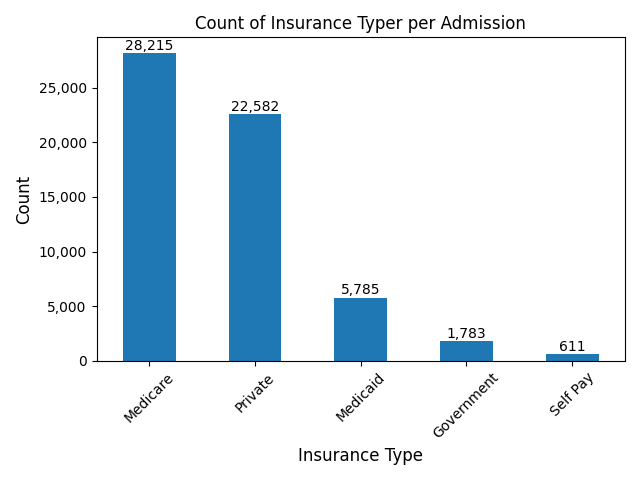

In [19]:
%matplot plt

### Ethnicity

In [21]:
x=df_admissions.groupBy("ethnicity").count().orderBy(F.col("count").desc()).toPandas()
x

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                            ethnicity  count
0                                               WHITE  40996
1                              BLACK/AFRICAN AMERICAN   5440
2                               UNKNOWN/NOT SPECIFIED   4523
3                                  HISPANIC OR LATINO   1696
4                                               OTHER   1512
5                                               ASIAN   1509
6                                    UNABLE TO OBTAIN    814
7                          PATIENT DECLINED TO ANSWER    559
8                                     ASIAN - CHINESE    277
9                      HISPANIC/LATINO - PUERTO RICAN    232
10                                 BLACK/CAPE VERDEAN    200
11                                    WHITE - RUSSIAN    164
12                               MULTI RACE ETHNICITY    130
13                                      BLACK/HAITIAN    101
14                               ASIAN - ASIAN INDIAN     85
15                      

In [26]:
df_admissions=df_admissions.withColumn("ethnicity_group",F.when(F.col("ethnicity").like("%WHITE%"),"White")
                      .when(F.col("ethnicity").like("%ASIAN%"),"Asian")
                      .when(F.col("ethnicity").like("%BLACK%"),"Black")
                      .when(F.col("ethnicity").like("%HISPANIC%"),"Hispanic")
                      .when(F.col("ethnicity").like("%UNKNOWN%"),"Unknown")
                      .when(F.col("ethnicity").like("%UNABLE%"),"Unknown")
                      .when(F.col("ethnicity").like("%DECLINED%"),"Unknown")
                      .otherwise("Other"))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
df_admissions.groupBy("ethnicity_group").count().orderBy(F.col("count").desc()).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+-----+
|ethnicity_group|count|
+---------------+-----+
|          WHITE|41325|
|        Unknown| 5896|
|          Black| 5785|
|       Hispanic| 2128|
|          Asian| 2007|
|          Other| 1835|
+---------------+-----+

In [38]:
x=df_admissions.groupBy('hadm_id',"ethnicity_group").count().select('ethnicity_group').toPandas()
plt.cla()
ax=x.value_counts().plot(kind='bar',legend=False)
ax.set_xlabel("Ethnicity Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.get_legend().remove()
rects = ax.patches[:6]
ax.set_xticklabels(['White','Unknown',"Black",'Hispanic',"Asian","Other"],rotation=45)

#print(rects)

# Make some labels.
labels = ["{:,d}".format(i) for i in x.value_counts()]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.title("Count of Ethnicity Type per Admission")
plt.tight_layout()
plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

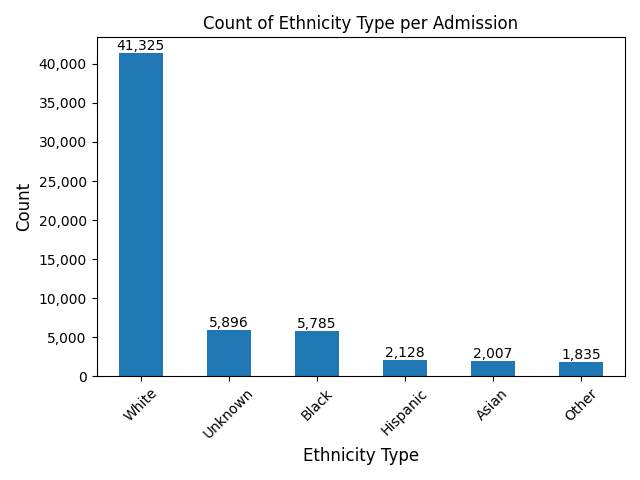

In [39]:
%matplot plt

### Religion

In [36]:
x=df_admissions.groupBy("religion").count().orderBy(F.col("count").desc()).toPandas()
x

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                  religion  count
0                 CATHOLIC  20606
1            NOT SPECIFIED  11753
2             UNOBTAINABLE   8269
3        PROTESTANT QUAKER   7134
4                   JEWISH   5314
5                    OTHER   2696
6             EPISCOPALIAN    774
7           GREEK ORTHODOX    459
8                     None    458
9      CHRISTIAN SCIENTIST    429
10                BUDDHIST    267
11                  MUSLIM    225
12       JEHOVAH'S WITNESS    139
13  UNITARIAN-UNIVERSALIST    124
14                   HINDU    113
15     ROMANIAN EAST. ORTH     83
16       7TH DAY ADVENTIST     81
17                 BAPTIST     28
18                  HEBREW     16
19               METHODIST      7
20                LUTHERAN      1

In [42]:
df_admissions=df_admissions.withColumn("religion_group",F.when(F.col("religion").like("%NOT%"),"Unknown")
                      .when(F.col("religion").like("%UNOBTAINABLE%"),"Unknown")
                      .when(F.col("religion").like("%CATHOLIC%"),"Catholic")
                      .when(F.col("religion").like("%PROTESTANT%"),"Protestant Quaker")
                      .when(F.col("religion").like("%JEWISH%"),"Jewish")
                      .when(F.col("religion").like("%EPISCOPALIAN%"),"Episcopalian")
                      .otherwise("Other"))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
df_admissions.groupBy("religion_group").count().orderBy(F.col("count").desc()).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-----+
|   religion_group|count|
+-----------------+-----+
|         Catholic|20606|
|          Unknown|20022|
|Protestant Quaker| 7134|
|           Jewish| 5314|
|            Other| 5126|
|     Episcopalian|  774|
+-----------------+-----+

In [46]:
x=df_admissions.groupBy('hadm_id',"religion_group").count().select('religion_group').toPandas()
plt.cla()
ax=x.value_counts().plot(kind='bar',legend=False)
ax.set_xlabel("Religion Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.get_legend().remove()
rects = ax.patches[:6]
ax.set_xticklabels(['Catholic','Unknown',"Protestant Quaker",'Jewish',"Other","Episcopalian"],rotation=45)

#print(rects)

# Make some labels.
labels = ["{:,d}".format(i) for i in x.value_counts()]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.title("Count of Religion Type per Admission")
plt.tight_layout()
plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

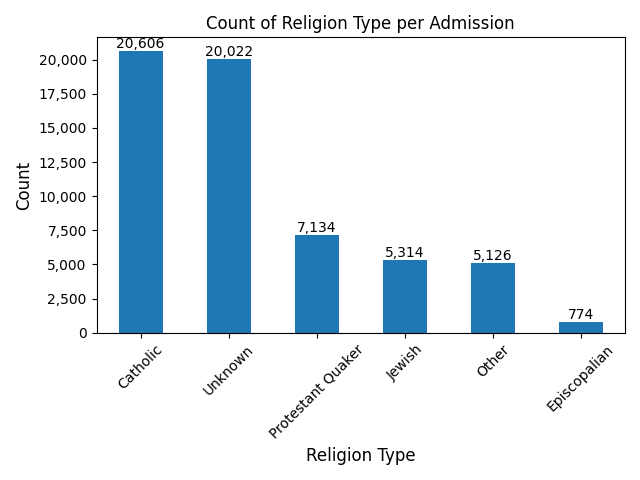

In [47]:
%matplot plt

### Marital Status

In [48]:
x=df_admissions.groupBy("marital_status").count().orderBy(F.col("count").desc()).toPandas()
x

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      marital_status  count
0            MARRIED  24239
1             SINGLE  13254
2               None  10128
3            WIDOWED   7211
4           DIVORCED   3213
5          SEPARATED    571
6  UNKNOWN (DEFAULT)    345
7       LIFE PARTNER     15

In [54]:
df_admissions=df_admissions.withColumn("marital_status_group",F.when(F.col("marital_status").like("%MARRIED%"),"Married")
                      .when(F.col("marital_status").like("%SINGLE%"),"Single")
                      .when(F.col("marital_status").like("%WIDOW%"),"Widowed")
                      .when(F.col("marital_status").like("%DIVORCE%"),"Divorced")
                      .when(F.col("marital_status").like("%SEPARATE%"),"Separated")
                      .otherwise("Other"))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
df_admissions.groupBy("marital_status_group").count().orderBy(F.col("count").desc()).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|marital_status_group|count|
+--------------------+-----+
|             Married|24239|
|              Single|13254|
|               Other|10488|
|             Widowed| 7211|
|            Divorced| 3213|
|           Separated|  571|
+--------------------+-----+

In [58]:
x=df_admissions.groupBy('hadm_id',"marital_status_group").count().select('marital_status_group').toPandas()
plt.cla()
ax=x.value_counts().plot(kind='bar',legend=False)
ax.set_xlabel("Marital Status Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.get_legend().remove()
rects = ax.patches[:6]
ax.set_xticklabels(['Married','Single',"Other",'Widowed',"Divorced","Separated"],rotation=45)

#print(rects)

# Make some labels.
labels = ["{:,d}".format(i) for i in x.value_counts()]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.title("Count of Marital Status Type per Admission")
plt.tight_layout()
plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

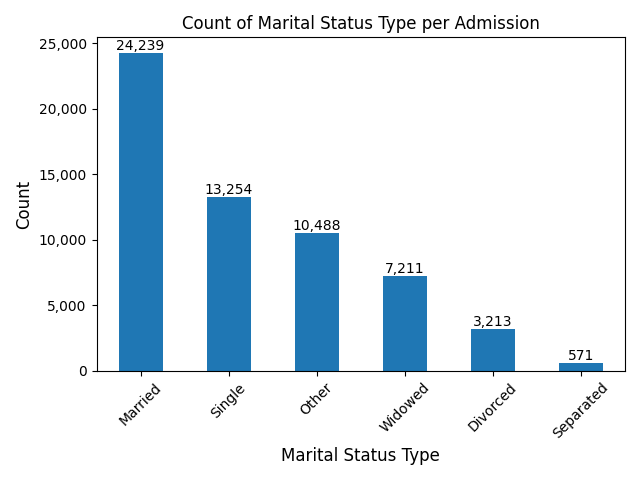

In [59]:
%matplot plt